In [52]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('../../../../data/ds_jobs.csv')
df.head(3)

df_clean = df.copy()
print(df_clean.columns.tolist())

['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


#### Suppression de la colonne `index`

In [54]:
df_clean.drop(columns=['index'],inplace=True)
df_clean

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\r\n\r\nWe’re looking for a data scient...,3.6,TRANZACT\r\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\r\nBecome a thought leader wit...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\r\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


### Nettoyage de `company_name`

In [55]:
df_clean['Company Name']=(
    df_clean['Company Name'].str.split('\n').str[0].str.strip()
)

df_clean['Company Name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 672, dtype: object

### Nettoyage de `salary_estimate` → `salary_avg_k`

In [56]:
def parse_salary(s):
    nums = re.findall(r'\d+', s)
    if len(nums) >= 2:
        return (int(nums[0]) + int(nums[1]))/2
    if len(nums) == 1:
        return float(nums[0])
    return np.nan

df_clean['salary_avg_k'] = df_clean['Salary Estimate'].apply(parse_salary)

print(f'Min : {df_clean["salary_avg_k"].min()} K$')
print(f'Max : {df_clean["salary_avg_k"].max()} K$')
print(f'Moy : {df_clean["salary_avg_k"].mean():.1f} K$')
print(f'NaN : {df_clean["salary_avg_k"].isna().sum()}')

Min : 43.5 K$
Max : 271.5 K$
Moy : 123.7 K$
NaN : 0


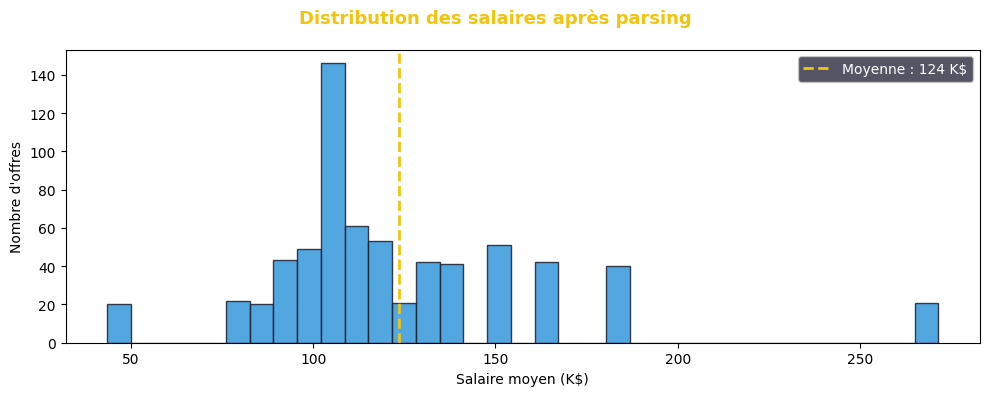

In [57]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Distribution des salaires après parsing', color='#f1c40f', fontsize=13, fontweight='bold')
ax.hist(df_clean['salary_avg_k'].dropna(), bins=35, color='#3498db', edgecolor='#1e1e2e', alpha=0.85)
ax.axvline(df_clean['salary_avg_k'].mean(), color='#f1c40f', linestyle='--', linewidth=2,
           label=f'Moyenne : {df_clean["salary_avg_k"].mean():.0f} K$')
ax.set_xlabel('Salaire moyen (K$)')
ax.set_ylabel("Nombre d'offres")
ax.legend(facecolor='#2a2a3e', labelcolor='white')
plt.tight_layout()
plt.show()

### 5. Remplacement des valeurs sentinelles `-1` → `NaN`

In [58]:
text_sentinel_cols = ['Headquarters', 'Size', 'Type Of Ownership',
                      'Industry', 'Sector', 'Revenue', 'Competitors']

for col in text_sentinel_cols :
    if col in df_clean.columns :
        n = (df_clean[col] == '-1').sum()
        df_clean[col] = df_clean[col].replace('-1', np.nan)

for col in ['Rating', 'Founded']:
    n = (df_clean[col] == -1).sum()
    df_clean[col] = df_clean[col].replace(-1, np.nan)

n_rev = (df_clean['Revenue'] == 'Unknown / Non-Applicable').sum()
df_clean['Revenue'] = df_clean['Revenue'].replace('Unknown / Non-Applicable', np.nan)
print(f'  {"revenue (Unknown/NA)":28s} → {n_rev:3d} remplacements')

n_size = (df_clean['Size'] == 'Unknown').sum()
df_clean['Size'] = df_clean['Size'].replace('Unknown', np.nan)
print(f'  {"size (Unknown)":28s} → {n_size:3d} remplacements')


nulls = df_clean.isnull().sum()
print(nulls[nulls > 0])

  revenue (Unknown/NA)         → 213 remplacements
  size (Unknown)               →  17 remplacements
Rating           50
Headquarters     31
Size             44
Founded         118
Industry         71
Sector           71
Revenue         240
Competitors     501
dtype: int64


#### Feature Engineering — `company_age` + `size_encoded`

In [59]:
df_clean['company_age'] = df_clean['Founded'].apply(
    lambda y: int(2025 - y) if pd.notna(y) else np.nan
)

print('company_age :')
print(df_clean['company_age'].describe().round(1))

company_age :
count    554.0
mean      40.9
std       40.7
min        6.0
25%       15.0
50%       26.0
75%       51.0
max      244.0
Name: company_age, dtype: float64


In [60]:
# ── size_encoded 
SIZE_ORDER = {
    '1 to 50 employees':       1,
    '51 to 200 employees':     2,
    '201 to 500 employees':    3,
    '501 to 1000 employees':   4,
    '1001 to 5000 employees':  5,
    '5001 to 10000 employees': 6,
    '10000+ employees':        7,
}

df_clean['size_encoded'] = df_clean['Size'].map(SIZE_ORDER)
print('\nsize_encoded — mapping :')
print(df_clean[['Size','size_encoded']].dropna().drop_duplicates().sort_values('size_encoded').to_string(index=False))


size_encoded — mapping :
                   Size  size_encoded
      1 to 50 employees           1.0
    51 to 200 employees           2.0
   201 to 500 employees           3.0
  501 to 1000 employees           4.0
 1001 to 5000 employees           5.0
5001 to 10000 employees           6.0
       10000+ employees           7.0


#### Extraction de l'état depuis `location`

In [61]:
df_clean['State'] = df_clean['Location'].str.split(',').str[-1].str.strip()

print(f'Locations brutes uniques : {df_clean["Location"].nunique()}')
print(f'States extraits uniques  : {df_clean["State"].nunique()}')
print('\nTop 10 états :')
print(df_clean['State'].value_counts().head(10))

Locations brutes uniques : 207
States extraits uniques  : 44

Top 10 états :
State
CA    165
VA     89
MA     62
NY     52
MD     40
IL     30
DC     26
TX     17
WA     16
OH     14
Name: count, dtype: int64


In [62]:
df_clean['State'] = df_clean['State'].replace({'Texas': 'TX', 'California': 'CA'})

#### Normalisation de `job_title`

In [63]:
def normalize_title(title):
    title = title.strip()
    replacements = {
        r'\bSr\.?\b': 'Senior',
        r'\bJr\.?\b': 'Junior',
        r'\bML\b':    'Machine Learning',
        r'\bDS\b':    'Data Science',
    }
    for pattern, repl in replacements.items():
        title = re.sub(pattern, repl, title, flags=re.IGNORECASE)
    return title.strip()

df_clean['job_title_clean'] = df_clean['Job Title'].apply(normalize_title)

print(f'Titres uniques avant : {df_clean["Job Title"].nunique()}')
print(f'Titres uniques après : {df_clean["job_title_clean"].nunique()}')
print('\nTop 10 titres normalisés :')
print(df_clean['job_title_clean'].value_counts().head(10))

Titres uniques avant : 172
Titres uniques après : 170

Top 10 titres normalisés :
job_title_clean
Data Scientist                                                                                      337
Data Engineer                                                                                        26
Senior Data Scientist                                                                                21
Machine Learning Engineer                                                                            16
Data Analyst                                                                                         12
Senior Data Analyst                                                                                   7
Senior Data Engineer                                                                                  5
Data Scientist - TS/SCI FSP or CI Required                                                            4
Data Science Software Engineer                                        

#### Nettoyage de `job_description`

In [64]:
def clean_description(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'-{3,}', '', text)        
    text = re.sub(r'\n{2,}', '\n', text)     
    text = re.sub(r'^Description\s*', '',    
                  text, flags=re.IGNORECASE)
    return text.strip()

df_clean['job_description_clean'] = df_clean['Job Description'].apply(clean_description)
df_clean['job_description_clean'] = df_clean['job_description_clean'].str.replace(r'\r\n', ' ', regex=True).str.strip()

avg_before = df_clean['Job Description'].str.len().mean()
avg_after  = df_clean['job_description_clean'].str.len().mean()
saved      = (avg_before - avg_after) / avg_before * 100

print(f'Longueur moyenne avant  : {avg_before:.0f} chars')
print(f'Longueur moyenne après  : {avg_after:.0f} chars')
print(f'Tokens économisés       : ~{saved:.1f}% (coût Azure AI réduit)')

Longueur moyenne avant  : 3521 chars
Longueur moyenne après  : 3484 chars
Tokens économisés       : ~1.0% (coût Azure AI réduit)


### Visualiser la distribution

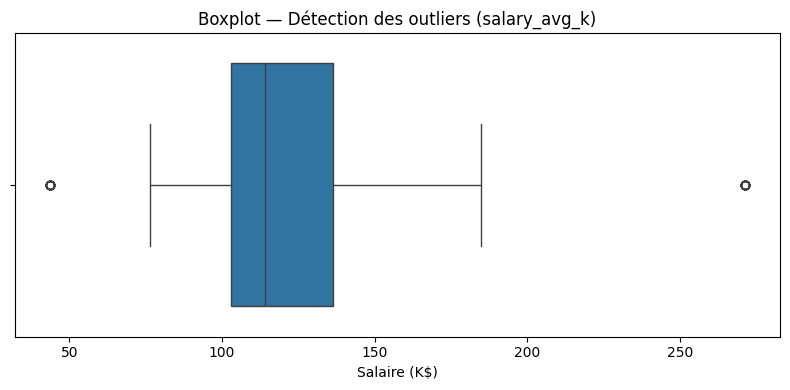

In [65]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['salary_avg_k'])
plt.title('Boxplot — Détection des outliers (salary_avg_k)')
plt.xlabel('Salaire (K$)')
plt.tight_layout()
plt.show()

### Calculer les bornes IQR

In [66]:
Q1 = df_clean['salary_avg_k'].quantile(0.25)
Q3 = df_clean['salary_avg_k'].quantile(0.75)
IQR = Q3 - Q1

borne_basse = Q1 - 1.5 * IQR
borne_haute = Q3 + 1.5 * IQR

print(f"Q1          : {Q1} K$")
print(f"Q3          : {Q3} K$")
print(f"IQR         : {IQR} K$")
print(f"Borne basse : {borne_basse:.2f} K$")
print(f"Borne haute : {borne_haute:.2f} K$")

Q1          : 103.0 K$
Q3          : 136.5 K$
IQR         : 33.5 K$
Borne basse : 52.75 K$
Borne haute : 186.75 K$


In [67]:
outliers = df_clean[df_clean['salary_avg_k'] > borne_haute][['job_title_clean', 'salary_avg_k', 'Sector']]
print(f"{len(outliers)} outliers détectés :\n")
print(outliers.to_string())

21 outliers détectés :

                                                                                      job_title_clean  salary_avg_k                     Sector
508                                                        Senior Principal Data Scientist (Python/R)         271.5  Biotech & Pharmaceuticals
509                                                                Real World Science, Data Scientist         271.5  Biotech & Pharmaceuticals
510                                                                                    Data Scientist         271.5          Business Services
511                                                       Data Scientist(s)/Machine Learning Engineer         271.5          Business Services
512                                                                             Senior Data Scientist         271.5        Aerospace & Defense
513                                                                                    Data Scientist         271.5   

### Supprimer les outliers

In [68]:
df_clean = df_clean[
    (df_clean['salary_avg_k'] >= borne_basse) &
    (df_clean['salary_avg_k'] <= borne_haute)
].reset_index(drop=True)


print(f"Après : {len(df_clean)} lignes")

Après : 631 lignes


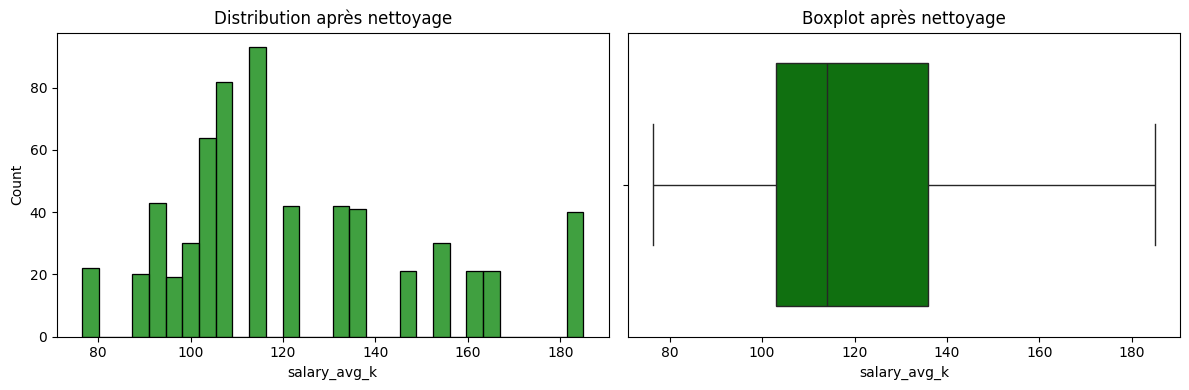

count    631.000000
mean     121.284469
std       27.025082
min       76.500000
25%      103.000000
50%      114.000000
75%      136.000000
max      185.000000
Name: salary_avg_k, dtype: float64


In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_clean['salary_avg_k'], bins=30, ax=axes[0], color='green')
axes[0].set_title('Distribution après nettoyage')

sns.boxplot(x=df_clean['salary_avg_k'], ax=axes[1], color='green')
axes[1].set_title('Boxplot après nettoyage')

plt.tight_layout()
plt.show()

print(df_clean['salary_avg_k'].describe())

#### Sélection des colonnes finales & Export

#### Visualisation finale du dataset nettoyé

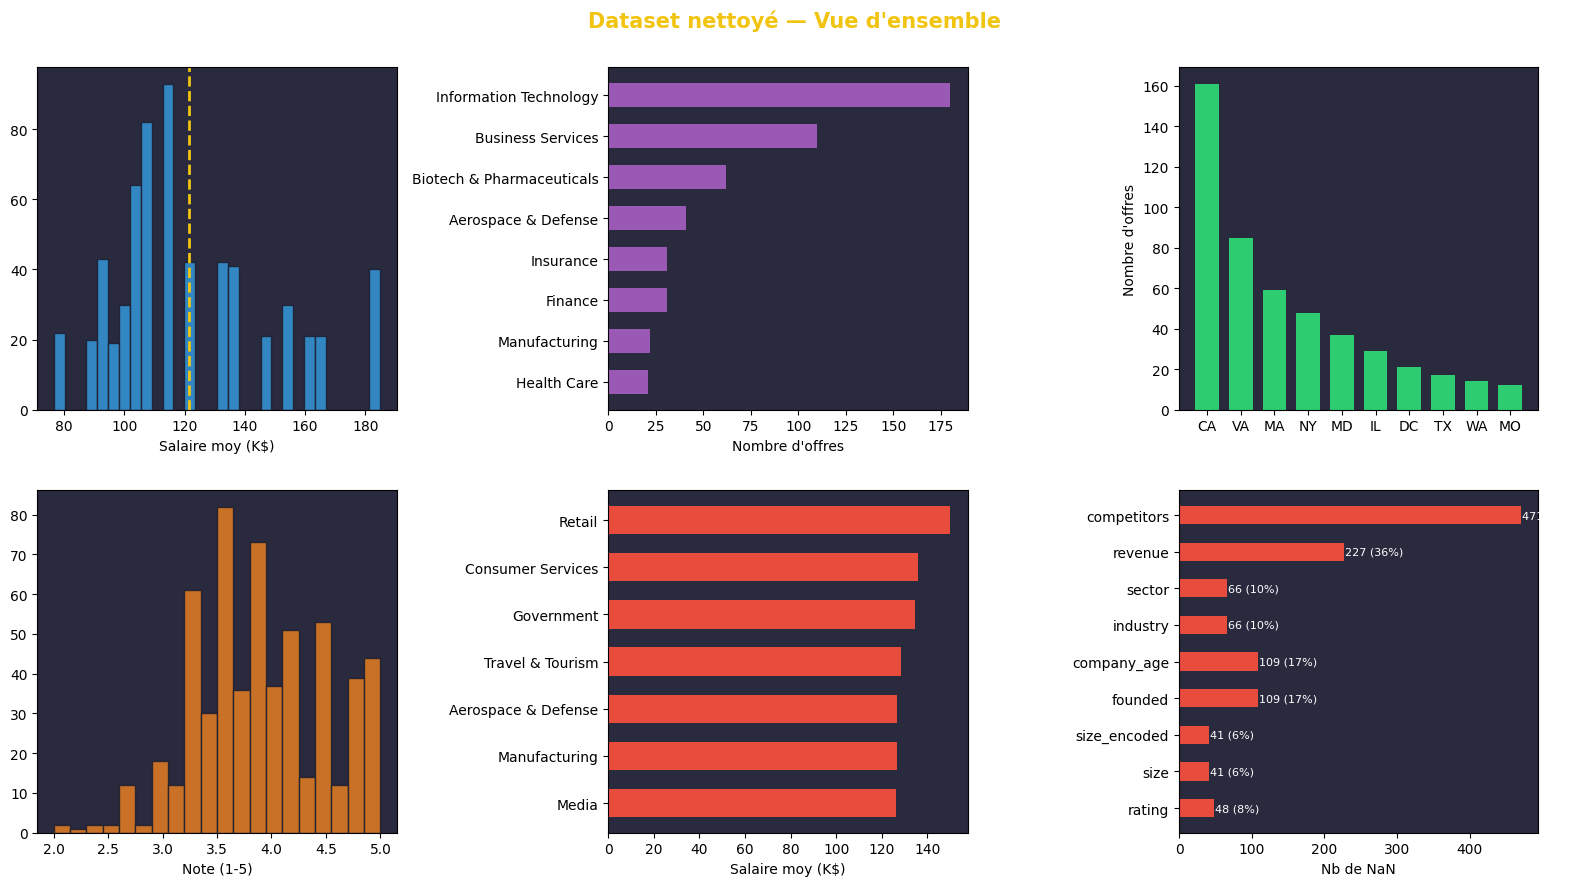

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Dataset nettoyé — Vue d\'ensemble', color='#f1c40f', fontsize=15, fontweight='bold')
axes = axes.flatten()

# 1. Distribution salaires
axes[0].hist(df_final['salary_avg_k'].dropna(), bins=30, color='#3498db', edgecolor='#1e1e2e', alpha=0.85)
axes[0].axvline(df_final['salary_avg_k'].mean(), color='#f1c40f', linestyle='--', linewidth=2)
axes[0].set_title('Distribution Salaires (K$)', color='white', fontweight='bold')
axes[0].set_xlabel('Salaire moy (K$)')

# 2. Top secteurs
sec = df_final['sector'].value_counts().head(8)
axes[1].barh(sec.index[::-1], sec.values[::-1], color='#9b59b6', height=0.6)
axes[1].set_title('Top Secteurs', color='white', fontweight='bold')
axes[1].set_xlabel("Nombre d'offres")

# 3. Top états
st = df_final['state'].value_counts().head(10)
axes[2].bar(st.index, st.values, color='#2ecc71', width=0.7)
axes[2].set_title('Top États', color='white', fontweight='bold')
axes[2].set_ylabel("Nombre d'offres")

# 4. Rating distribution
axes[3].hist(df_final['rating'].dropna(), bins=20, color='#e67e22', edgecolor='#1e1e2e', alpha=0.85)
axes[3].set_title('Distribution Rating', color='white', fontweight='bold')
axes[3].set_xlabel('Note (1-5)')

# 5. Salaire par secteur (top 6)
top_sec = df_final.groupby('sector')['salary_avg_k'].mean().nlargest(7)
axes[4].barh(top_sec.index[::-1], top_sec.values[::-1], color='#e74c3c', height=0.6)
axes[4].set_title('Salaire moy par Secteur (K$)', color='white', fontweight='bold')
axes[4].set_xlabel('Salaire moy (K$)')

# 6. Valeurs nulles restantes
nulls = df_final.isnull().sum()
nulls = nulls[nulls > 0]
axes[5].barh(nulls.index, nulls.values, color='#e74c3c', height=0.5)
axes[5].set_title('Valeurs nulles restantes', color='white', fontweight='bold')
axes[5].set_xlabel('Nb de NaN')
for i, (col, val) in enumerate(nulls.items()):
    axes[5].text(val+1, i, f'{val} ({val/len(df_final)*100:.0f}%)', va='center', color='white', fontsize=8)

for ax in axes:
    ax.set_facecolor('#2a2a3e')

plt.tight_layout()
plt.show()

In [71]:

df2 = pd.read_csv('../../../../data/extracted_skills_only.csv')

df_clean['extracted_skills'] = df2['extracted_skills']

print(df_clean.shape)
print(df_clean[['job_title_clean', 'extracted_skills']].head())

(631, 21)
         job_title_clean                                   extracted_skills
0  Senior Data Scientist  ['forecast', 'data', 'technologies', 'multivar...
1         Data Scientist  ['math', 'technologies', 'code', 'distributed'...
2         Data Scientist  ['written', 'collaborating', 'recherche', 'd3)...
3         Data Scientist  ['data', 'technologies', 'time series data', '...
4         Data Scientist  ['data', 'technologies', 'marketing', 'campaig...


In [72]:

df_clean.columns = (
    df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_', regex=False)
    .str.replace('/', '_', regex=False)
)
# Colonnes finales
COLS_FINAL = [
    'job_title_clean',        # pour SQL
    'job_description_clean',  # pour NER → skills_extracted
    'salary_estimate',        # brut conservé
    'salary_avg_k',           # cible ML
    'rating',
    'company_name',
    'location',
    'state',
    'size',
    'size_encoded',
    'founded',
    'company_age',
    'type_of_ownership',
    'industry',
    'sector',
    'revenue',
    'competitors',
    "extracted_skills"
]
# Changer ligne suppression colonnes
cols_to_drop = [col for col in ["index", "Competitors", "Revenue"] if col in df.columns]

df_final = df_clean[COLS_FINAL].copy()

print(f'Dimensions finales : {df_final.shape}')
print(f'\nValeurs nulles restantes :')
nulls = df_final.isnull().sum()
print(nulls[nulls > 0])

df_final.to_csv('../../../../data/ds-jobs-clean.csv', index=False)
print('\n✅ Fichier exporté : ds-jobs-clean.csv')

Dimensions finales : (631, 18)

Valeurs nulles restantes :
rating           48
size             41
size_encoded     41
founded         109
company_age     109
industry         66
sector           66
revenue         227
competitors     471
dtype: int64

✅ Fichier exporté : ds-jobs-clean.csv
